Step 1: Data Preprocessing
Columns after dropping unnecessary columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Columns after one-hot encoding:
Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'Perc

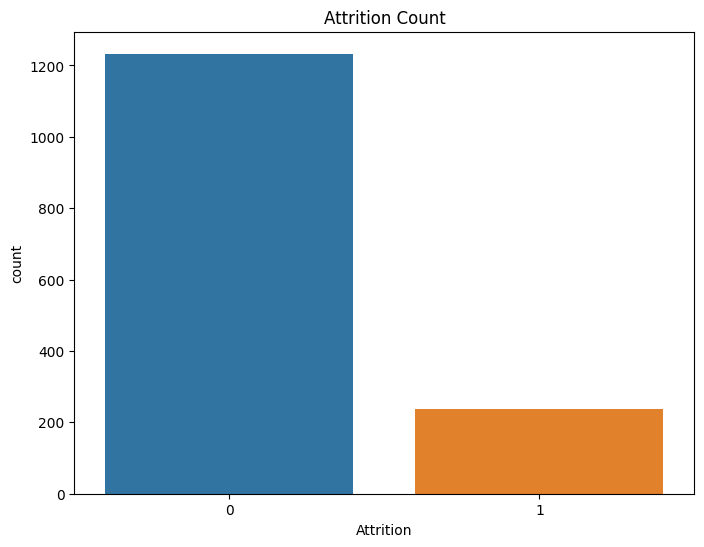


Step 3: Build Logistic Regression Model
Accuracy for Logistic Regression: 0.8639455782312925
Confusion Matrix for Logistic Regression:
[[380   0]
 [ 60   1]]

Step 4: Build Decision Tree Model
Accuracy for Decision Tree: 0.780045351473923
Confusion Matrix for Decision Tree:
[[321  59]
 [ 38  23]]

Step 5: Results
Accuracy for Logistic Regression: 0.8639455782312925
Confusion Matrix for Logistic Regression:
[[380   0]
 [ 60   1]]
Accuracy for Decision Tree: 0.780045351473923
Confusion Matrix for Decision Tree:
[[321  59]
 [ 38  23]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print(" Data Preprocessing")
print("=================================")

df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
print("Columns after dropping unnecessary columns:")
print(df.columns)

cleanup_nums = {'Attrition': {'Yes': 1, 'No': 0}, 'OverTime': {'Yes': 1, 'No': 0}}
df.replace(cleanup_nums, inplace=True)

df = pd.get_dummies(df, drop_first=True)
print("Columns after one-hot encoding:")
print(df.columns)

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nStep 2: Data Visualization")
print("============================")

plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

print("\nStep 3: Build Logistic Regression Model")
print("=========================================")
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

logreg_pred = logreg_model.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Accuracy for Logistic Regression:", logreg_accuracy)

logreg_confusion_matrix = confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix for Logistic Regression:")
print(logreg_confusion_matrix)

print("\nStep 4: Build Decision Tree Model")
print("===================================")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy for Decision Tree:", dt_accuracy)

dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix for Decision Tree:")
print(dt_confusion_matrix)

print("\nStep 5: Results")
print("================")
print("Accuracy for Logistic Regression:", logreg_accuracy)
print("Confusion Matrix for Logistic Regression:")
print(logreg_confusion_matrix)
print("Accuracy for Decision Tree:", dt_accuracy)
print("Confusion Matrix for Decision Tree:")
print(dt_confusion_matrix)
